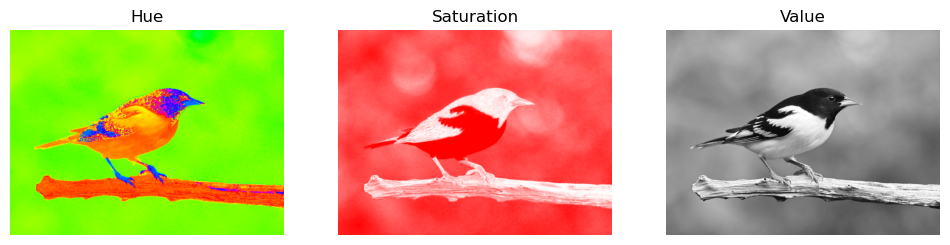

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb

# Đọc ảnh RGB
img = iio.imread('bird.png')  # Đổi tên file nếu cần
img_rgb = img[..., :3] / 255.0  # Chuẩn hóa về [0,1] nếu ảnh uint8

# Chuyển sang HSV
img_hsv = rgb_to_hsv(img_rgb)

# Tạo ảnh chỉ giữ từng kênh HSV
hue = np.zeros_like(img_hsv)
hue[..., 0] = img_hsv[..., 0]
hue[..., 1] = 1
hue[..., 2] = 1
hue_rgb = hsv_to_rgb(hue)
iio.imwrite('hue.png', (hue_rgb * 255).astype(np.uint8))

sat = np.zeros_like(img_hsv)
sat[..., 1] = img_hsv[..., 1]
sat[..., 0] = 0
sat[..., 2] = 1
sat_rgb = hsv_to_rgb(sat)
iio.imwrite('saturation.png', (sat_rgb * 255).astype(np.uint8))

val = np.zeros_like(img_hsv)
val[..., 2] = img_hsv[..., 2]
val[..., 0] = 0
val[..., 1] = 0
val_rgb = hsv_to_rgb(val)
iio.imwrite('value.png', (val_rgb * 255).astype(np.uint8))

# Hiển thị 3 ảnh
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(hue_rgb)
axs[0].set_title('Hue')
axs[1].imshow(sat_rgb)
axs[1].set_title('Saturation')
axs[2].imshow(val_rgb)
axs[2].set_title('Value')
for ax in axs:
    ax.axis('off')
plt.show()